# SVM MNIST with GridSearch

Bienvenue dans ce projet dans lequel nous allons classifier les données de la base MNIST.

## Les données
la base de données MNIST est une énorme base de données de chiffres écrits manuellement qui est normalement utilisée pour préparer différents systèmes de traitement d’images. La base de données est en outre généralement utilisée pour préparer et tester dans le domaine de l’apprentissage automatique.

les images très contrastées du NIST ont été normalisées pour tenir dans une boîte de délimitation de 28×28 pixels et hostiles à l’association, qui présentait des niveaux de gris.

La base de données du MNIST contient 60 000 images de préparation et 10 000 images d’essai. 

![Mnist digits](https://miro.medium.com/max/495/0*94t_5cPF9mvBj20z.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DiouaneAbdallah/SVM-MNIST-with-GridSearch/blob/main/SvmMnistGridSearch.ipynb)

---

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm,datasets
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Chargement de données

In [2]:
!gdown --id 1gyRikcDwyUJk2DB90cr5R2vEa3Tze7-V

Downloading...
From: https://drive.google.com/uc?id=1gyRikcDwyUJk2DB90cr5R2vEa3Tze7-V
To: /content/mnist-in-csv.zip
100% 16.0M/16.0M [00:00<00:00, 130MB/s]


In [3]:
!unzip '/content/mnist-in-csv.zip'

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_train.csv         
  inflating: mnist_test.csv          


In [4]:
MNIST_train = pd.read_csv('/content/mnist_train.csv')
MNIST_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


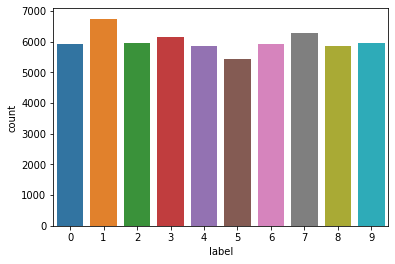

In [6]:
sns.countplot(x = MNIST_train['label'])
plt.show()

## Entrainement/ test

In [7]:
MNIST_train_ = MNIST_train.iloc[:1000,:]

In [8]:
X_tr = MNIST_train_.iloc[:,1:]
y_tr = MNIST_train_.iloc[:, 0]

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [10]:
scaler = StandardScaler()
scaler.fit(X_tr,y_tr)

StandardScaler()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=30, stratify=y_tr)

## Entrainement du modèle

In [13]:
from sklearn.svm import SVC

In [14]:
C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

In [15]:
grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True,verbose=2, n_jobs=-1)

In [17]:
grid.fit(X_train, y_train)
print("score = %3.2f" %(grid.score(X_test, y_test)))
print("Meilleurs paramètres à partir des données de train: ", grid.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
score = 0.91
Meilleurs paramètres à partir des données de train:  {'C': 0.01, 'gamma': 1e-09, 'kernel': 'linear'}


In [18]:
modele = svm.SVC(kernel='linear',C=0.01,gamma=1e-09)

In [19]:
modele.fit(X_train, y_train)

SVC(C=0.01, gamma=1e-09, kernel='linear')

## L'évaluation du modèle

In [20]:
y_pred = modele.predict(X_test)

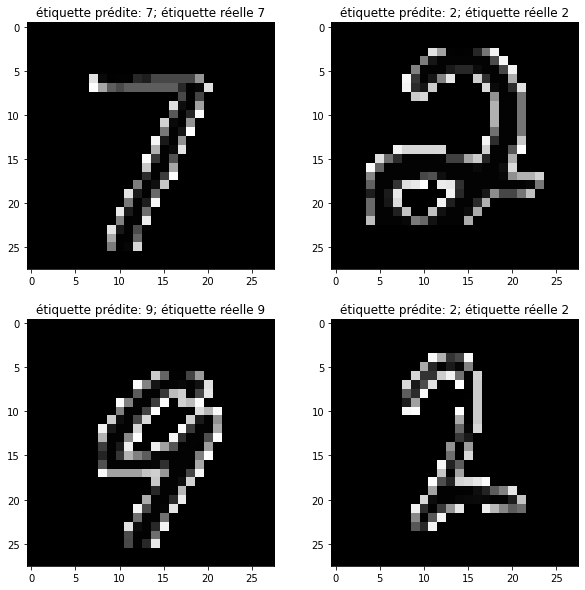

In [23]:
rand_in = np.random.randint(0,X_test.shape[0],4)

plt.figure(figsize=[10,10])

two_d1 = (np.reshape(X_test.values[rand_in[0]], (28, 28)) * 255).astype(np.uint8)
plt.subplot(221)
plt.title('étiquette prédite: {0}; étiquette réelle {1}'. format(y_pred[rand_in[0]],y_test.iloc[rand_in[0]]))
plt.imshow(two_d1, interpolation='nearest', cmap='gray')

two_d2 = (np.reshape(X_test.values[rand_in[1]], (28, 28)) * 255).astype(np.uint8)
plt.subplot(222)
plt.title('étiquette prédite: {0}; étiquette réelle {1}'. format(y_pred[rand_in[1]],y_test.iloc[rand_in[1]]))
plt.imshow(two_d2, interpolation='nearest', cmap='gray') 

two_d3 = (np.reshape(X_test.values[rand_in[2]], (28, 28)) * 255).astype(np.uint8)
plt.subplot(223)
plt.title('étiquette prédite: {0}; étiquette réelle {1}'. format(y_pred[rand_in[2]],y_test.iloc[rand_in[2]]))
plt.imshow(two_d3, interpolation='nearest', cmap='gray') 

two_d4 = (np.reshape(X_test.values[rand_in[3]], (28, 28)) * 255).astype(np.uint8)
plt.subplot(224)
plt.title('étiquette prédite: {0}; étiquette réelle {1}'. format(y_pred[rand_in[3]],y_test.iloc[rand_in[3]]))
plt.imshow(two_d4, interpolation='nearest', cmap='gray')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.92      1.00      0.96        23
           2       0.90      0.95      0.93        20
           3       1.00      0.89      0.94        19
           4       0.84      1.00      0.91        21
           5       0.82      0.78      0.80        18
           6       0.89      0.89      0.89        19
           7       1.00      0.87      0.93        23
           8       0.93      0.72      0.81        18
           9       0.82      0.90      0.86        20

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200

[[19  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  1  0]
 [ 0  0  1 17  0  1  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  1 14  2  0  0  1]
 [ 0  1  0  0  1  0 17  0  0  0]
 [ 0  0  0